In [ ]:
### Track cells through shape and distance

In [1]:
import os, shutil
import numpy as np
import matplotlib.pyplot as plt
from cellpose import core, utils, io, models, metrics
from glob import glob
from natsort import natsorted
import imageio.v2 as iio

In [123]:
t1 = natsorted(glob("t1/*png"))
test_image_path = t1[10]
test_image = iio.imread(test_image_path)

In [124]:
test_image = iio.imread(test_image_path)
test_image.shape


(512, 512, 4)

In [ ]:
import numpy as np

def assign_labels_to_colors(image):
    if image.shape[2] == 4:
        image = image[:, :, :3]  # Keep only the first three channels (RGB)
    
    flat_image = image.reshape(-1, image.shape[2])
    unique_colors = np.unique(flat_image, axis=0)
    
    color_to_label = {}
    label = 0  # Initialize label counter
    for color in unique_colors:
        color_to_label[tuple(color)] = label
        label += 1  # Increment label for the next unique color


    label_to_color = {}
    for label, color in color_to_label.items():
        label_to_color[color] = label
    
    # Initialize an empty 3D array for the RGB labeled image
    labeled_image = np.zeros((512, 512, 3), dtype=np.uint8)
    
    # Assign RGB colors to the original image based on the label
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            label = color_to_label[tuple(image[x, y])]
            color = label_to_color[label]

            labeled_image[x, y] = label_to_color[label]
    
    return labeled_image

In [125]:
if test_image.shape[2] == 4:
    test_image = test_image[:, :, :3]  # Keep only the first three channels (RGB)

In [ ]:

    
flat_image = test_image.reshape(-1, test_image.shape[2])
unique_colors = np.unique(flat_image, axis=0)
 
color_to_label = {}
label = 0  # Initialize label counter
for color in unique_colors:
    color_to_label[tuple(color)] = label
    label += 1  # Increment label for the next unique color

label_to_color = {}
for label, color in color_to_label.items():
    label_to_color[color] = label

In [ ]:
# Modified version to include points
def assign_labels_to_points_and_colors(label, points):
    if label not in label_points_map:
        label_points_map[label] = {'color': None, 'points': []}
    
    # Assign color to label if not already done
    if label_points_map[label]['color'] is None:
        label_points_map[label]['color'] = label_to_color[label]
    
    # Append points to the label
    label_points_map[label]['points'].extend(points)

    return label_points_map[label]

# Example usage
label_points_map = {}  # Global dictionary to hold the mapping
label = 'some_label'
points = []  # Example points associated with the label
assign_labels_to_points_and_colors(label, points)

# Now, label_points_map will contain a mapping of labels to their colors and points

In [126]:
# Assuming test_image is a numpy array of shape (height, width, channels)
height, width, _ = test_image.shape

# Initialize an empty dictionary to hold the color to label mappings
color_to_label = {}
label = 0  # Initialize label counter

# Initialize an empty dictionary to hold the label to color mappings
label_to_color = {}

# Iterate over each pixel in the image
for x in range(height):
    for y in range(width):
        color = tuple(test_image[x, y])
        # Check if the color is already in the dictionary
        if color not in color_to_label:
            # Assign a new label to this unique color
            color_to_label[color] = label
            label_to_color[label] = color
            label += 1  # Increment label for the next unique color

# Now, color_to_label contains mappings from colors to labels
# and label_to_color contains mappings from labels to colors

# If you need to create a labeled image based on these mappings:
labeled_image = np.zeros((height, width, 3), dtype=np.uint8)

# Assign labels to the original image based on the color
for x in range(height):
    for y in range(width):
        color = tuple(test_image[x, y])
        label = color_to_label[color]
        # Here you can decide how to use the label. For example, you might want to:
        # - Directly use the label as a color (if it makes sense in your context)
        # - Map the label to a specific color using label_to_color
        # For demonstration, let's just copy the original color using the label
        labeled_image[x, y] = np.array(label_to_color[label], dtype=np.uint8)

# labeled_image now contains the image with labels assigned to each pixel

In [127]:
# Initialize cells array with the correct shape
rows, cols = (len(color_to_label), 0)
# method 2 1st approach
cells = [[] for _ in range(rows)]

# Rest of the code remains the same
im = test_image[:, :, :3]

In [128]:
cells

[[], [], [], [], [], []]

In [129]:
for x in range(height):
    for y in range(width):
        color = tuple(im[x, y])
        label = color_to_label[color]
        cells[label].append(tuple((x, y)))


In [130]:
del cells[0]

In [131]:
cells[0][-1]

(324, 285)

In [132]:
centers = []
for arr in cells:
    total = (0,0)
    count = 0
    for point in arr:
        total = tuple(map(sum, zip(total, point)))
        count += 1
    
    center = tuple(x/count for x in total)
    centers.append(center)

In [133]:
centers[0]

(199.95747747747748, 221.99495495495495)

In [134]:
compare_image = t1[11]
compare_image = iio.imread(compare_image)

In [154]:
cells2 = [[] for _ in range(rows)]
for x in range(height):
    for y in range(width):
        color = tuple(im[x, y])
        label = color_to_label[color]
        cells2[label].append(tuple((x, y)))

KeyError: (150, 0, 200)

In [153]:
cells2

[[], [], [], [], [], []]

In [151]:
centers2 = []
for arr in compare_image:
    total = (0,0)
    count = 0
    for point in arr:
        total = tuple(map(sum, zip(total, point)))
        count += 1
    
    center = tuple(x/count for x in total)
    centers2.append(center)

In [152]:
centers2

[(255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0),
 (255.0, 255.0

In [139]:
del centers[2]

In [150]:
color_to_label

{(255, 255, 255): 0,
 (0, 255, 0): 1,
 (255, 0, 0): 2,
 (0, 0, 255): 4,
 (255, 0, 255): 5}

In [149]:
del color_to_label[(150, 0, 200)]

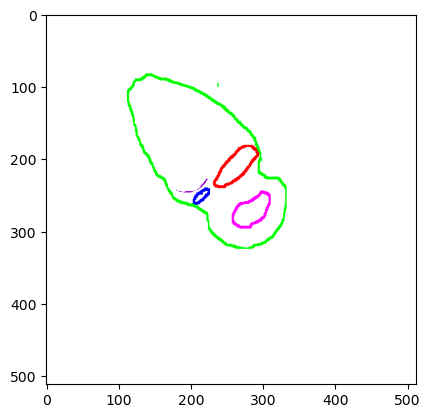

In [136]:
plt.imshow(test_image)

In [ ]:
test_image[243][211]

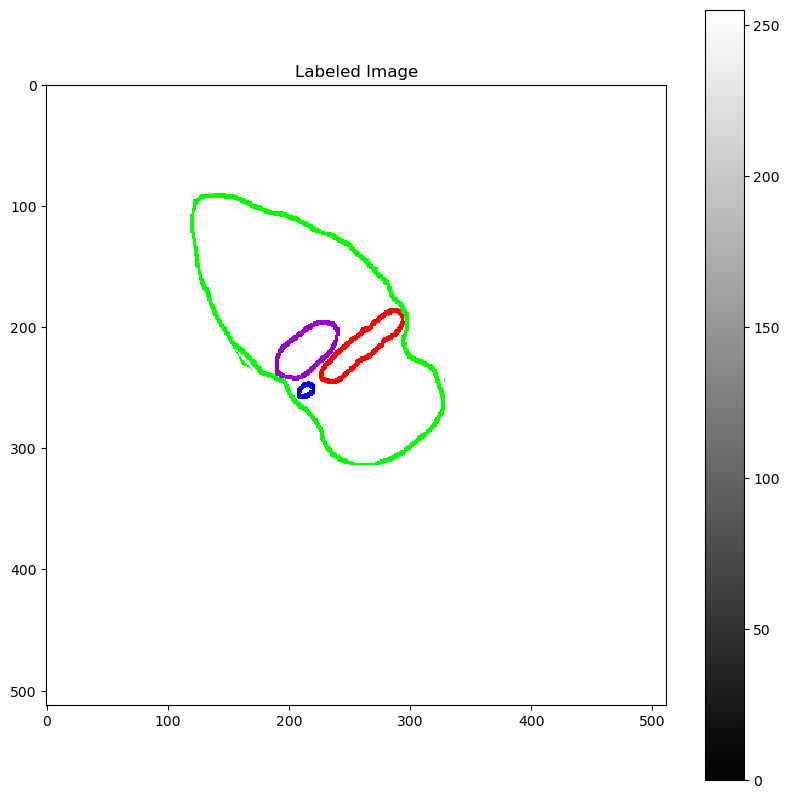

In [12]:
import matplotlib.pyplot as plt

# Plot the labeled image
plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
plt.imshow(labeled_image, cmap='grey', interpolation='none')  # 'nipy_spectral' is a good colormap for distinct colors
plt.colorbar()  # Show color scale
plt.title('Labeled Image')

plt.show()

In [ ]:
labeled_image.shape

In [ ]:
# Convert the data type of labeled_image to uint8
#labeled_image = labeled_image.astype(np.uint8)

# Save the labeled image
iio.imwrite('labeled_image.png', test_image)

In [ ]:
print(unique_labels)

In [ ]:
# Loop through all files in t1 and add each cell in a new position to a vector of all the cells with their x, y center
cells = []

for file in t1:
    im = iio.imread(file)

    unique_labels = np.unique(im)
    #unique_labels[unique_labels != 0]

    for label in unique_labels:
        positions = np.argwhere(im == label)
        center = positions.mean(axis=0)
        cells.append(center)
    


In [ ]:
len(cells)

In [ ]:
cells = []

labeled_image = assign_labels_to_colors(test_image)
print(labeled_image)